<a href="https://colab.research.google.com/github/Donald-Mathew/Analytics/blob/main/dataanalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

titanic = pd.read_csv("titanic.csv")
titanic.head(6)  #check the first 6 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
categorical = titanic.dtypes[titanic.dtypes == "object"].index
print(categorical)

titanic[categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
#after looking at the data for the first time, you should
#ask yourself a few questions
#1.Do I need all of the variables? 2.Should I transform any variables
#Are there NA values, outliers or strange values?
#Should I create new variables

In [ ]:
del titanic["PassengerId"]   #removing PassangerID Column

In [ ]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#"Survived" shows whether each passanger lived or died.Since predicting
#survival is our goal, we need to keep it
#Features that describe passangers numerically or group them into a few broad
#categories could be useful for predicting survival
#The variables Pclass, sex, Age, Sibsp, Parch, Fare and Embarked seem
#to be useful

In [ ]:
sorted(titanic["Name"])[0:15]

['Abbing, Mr. Anthony',
 'Abbott, Mr. Rossmore Edward',
 'Abbott, Mrs. Stanton (Rosa Hunt)',
 'Abelson, Mr. Samuel',
 'Abelson, Mrs. Samuel (Hannah Wizosky)',
 'Adahl, Mr. Mauritz Nils Martin',
 'Adams, Mr. John',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Aks, Mrs. Sam (Leah Rosen)',
 'Albimona, Mr. Nassef Cassem',
 'Alexander, Mr. William',
 'Alhomaki, Mr. Ilmari Rudolf',
 'Ali, Mr. Ahmed',
 'Ali, Mr. William',
 'Allen, Miss. Elisabeth Walton']

In [ ]:
titanic["Name"].describe()

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object

In [ ]:
titanic.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C


In [ ]:
titanic["Cabin"][0:15]

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

In [ ]:
titanic["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [ ]:
#sometime we may want to change the name of a variable
#For instance, Survived is just an integer variable that takes 0 or 1
#based on whether a passanger died ir survived respectively.Variables
#that indicate a state of sth with numbers is sometime called
#indicator or dummy variables (0 for absence and 1 for presence)
#We can encode survived as a categorical variable with more descriptive categories

new_survived = pd.Categorical(titanic["Survived"])
print(new_survived)

[0, 1, 1, 1, 0, ..., 0, 1, 0, 1, 0]
Length: 891
Categories (2, int64): [0, 1]


In [ ]:
new_survived = new_survived.rename_categories(["Died", "Survived"])
print(new_survived)

['Died', 'Survived', 'Survived', 'Survived', 'Died', ..., 'Died', 'Survived', 'Died', 'Survived', 'Died']
Length: 891
Categories (2, object): ['Died', 'Survived']


In [ ]:
new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


In [ ]:
#there is one more variable that has a questionable data encoding: Pclass
#Pclass is an integer that highlights a passanger's class with 1 being firstclass
#2 being second class and 3 being 3rd class
#passanger class is a category so it does not make a lot of sense
#to encode it as a numeric variable.Thus we can transform P into
#an ordered categorical variable

new_Pclass = pd.Categorical(titanic["Pclass"], ordered = True)

new_Pclass = new_Pclass.rename_categories(["Class1", "Class2", "Class3"])

new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [ ]:
titanic["Pclass"] = new_Pclass



In [ ]:
titanic["Cabin"].unique()   #to check unique values

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
import numpy as np
char_cabin = titanic["Cabin"].astype(str) #converts data to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) #Take first letter

new_Cabin = pd.Categorical(new_Cabin)

new_Cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [ ]:
titanic["Cabin"] = new_Cabin

In [ ]:
#Detecting missing values is the easy but it is far more difficult
#to decide how to handle them.In cases where you have a lot of data
# and only a few missing values, it may make sense to simply delete
#records with missing values present
#on the other hand, if you have many missing values, removing
#records with missing values could cause you to get rid of a lot of data
#missing values in categorical data is not particularly troubling since
#you can simply treat NA as an additional category.Missing values in
# numerical variables are more troublesome,since you cannot just treat a missing
#value as a number.
#it turns out that the titanic dataset has some NAs in the Age variable


titanic["Age"].describe()
#we realize that the count in the Age column is fewer than the total records
#perhaps 891 I believe



count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
#we can get the row indexes of the missing values with np.where()

missing = np.where(titanic["Age"].isnull()  == True)


(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
        48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
       126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
       196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
       270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
       334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
       409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
       459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
       511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
       564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
       613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
       692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
       773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
       839, 846, 849, 859, 863, 868, 878, 888]),)


In [ ]:
len(missing[0])

177

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

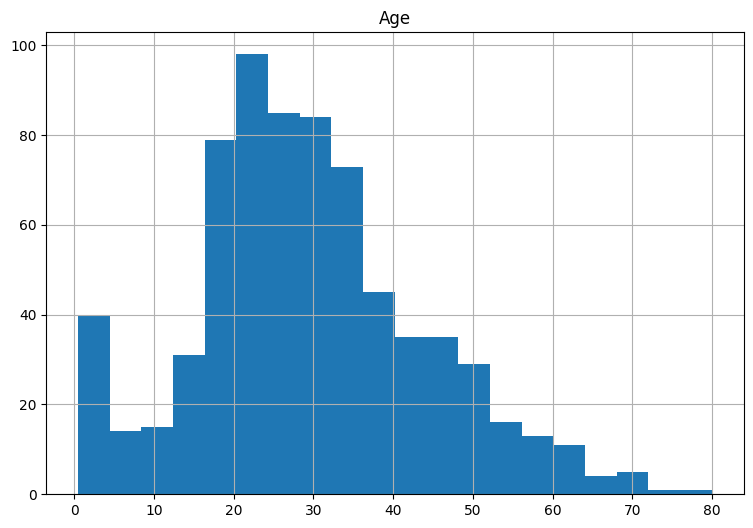

In [ ]:
#with 177 missing values it is probably not a good idea to throw all those
#records away.We could deal with them by:
#Replacing the null values with 0s
#Replace the null values with some central value like the mean or the median
#Impute some other value
#Split the data set into two parts: One set with where records have an Age value
#and another null

#setting missing values in numeric data to zero makes sense in some cases
#but it does not make sense here since a person's age cannot be zero.Setting
#all ages to some central number like the median is a simple fix but there
#is no telling whether such a central number is a reasonable estimate
#of age without lookng at the distribution of ages.For all we know each age
#is equally common.We can quickly get a sense of the distribution of ages
#by creating a histogram of the ages variable with df.hist():


titanic.hist(column = "Age", figsize=(9,6), bins = 20)

In [ ]:
#from the histogram,it is evident that ages between 20 and 30 are the most common
#so filling in missing values with a central number like the mean or the median
#would not be entirely unreasonable.So we can fill in missing values with the
#median age of 28

new_age_var = np.where(titanic["Age"].isnull(), #logical check
                       28,    #value if check is True
                       titanic["Age"]) #value if check is False

titanic["Age"] =  new_age_var
titanic["Age"].describe()


count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

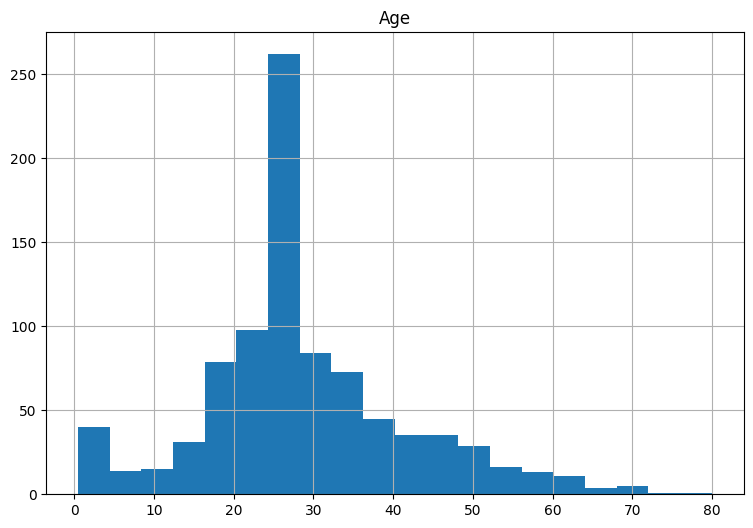

In [ ]:
titanic.hist(column = "Age",
             figsize = (9,6),
             bins = 20)

<Axes: >

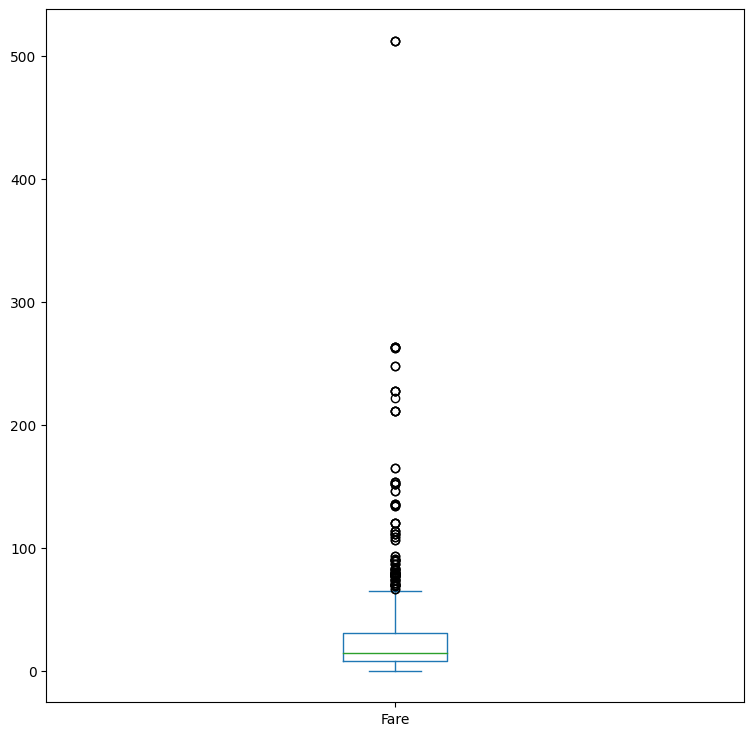

In [ ]:
#we can demonstrate outliers by producing a boxplot on the Fare variable

titanic["Fare"].plot(kind = "box",
                     figsize = (9,9))

In [ ]:
index = np.where(titanic["Fare"] == max(titanic["Fare"]))

titanic.loc[index]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,1,Class1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,n,C
679,1,Class1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B,C
737,1,Class1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B,C


In [ ]:
#creating new variables is called feature engineering.It could be as easy as
#performing arithmetic operations on variables




In [ ]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# we can create a new variable called family that combines SibSp and
# Parch to show the total number of family members ie siblings, spouses,
# parents and children ) that a passanger has onboard ie the total number
#of families
#for interest sake we can find out who had the most family members on board

titanic["Family"] = titanic["SibSp"] + titanic["Parch"]
import numpy as np

most_family_members = np.where(titanic["Family"] == max(titanic["Family"]))

titanic.loc[most_family_members]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,10
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,10
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,10
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,10
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,10
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,10
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,10


In [ ]:
#based on the above there were many people with ten family members  with 8
#siblings/ spouses and 2 parents or children
#on board and sadly none of the family members survived

In [ ]:
#Text data screening and cleaning is one of the most time-intensive affairs in data analysis
#due to the presence of many irregularities

#However,numeric datasets  are relatively well-behaved than text data.Numeric
#variables with large values can also dominate those with smaller values when
#using some modelling techniques
#Thus centering and scaling are crucial preprocessing techniques
#the simplest way of centering data is subtracting the mean value from every data
#point since subtracting the mean centers the data around zero and sets the
#new mean to zero

%matplotlib inline

import numpy as np
import pandas as pd

mtcars = pd.read_csv("mtcars.csv")

mtcars.index = mtcars.model
del mtcars["model"]

mtcars.head()

#The sum() function is meant to work with iterable data structures such as
# tuples, arrays and tuples enabling one to calculate the summation of elements
# in these structures
#Conversely, the "shape" method is particular to specific data structures such as
# Numpy arrays and Pandas dataframe and shape () cannot be used for such strcutrues
# instead we use len() to find the length or size of an iterable





,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
colmeans = mtcars.sum() / mtcars.shape[0]
print (colmeans)

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64


In [ ]:
#mtcars.index = mtcars.model #setting row index
#del mtcars["model"]
# the shape attribute on a numpy array or a Pandas dataframe returns a
#tuple representing the dimension of the array or the dataframe
#when we access the index "0" of mtcars.shape; we retrieve the no of rows
#in the dataframe since it is the first element returned by shape attribute
#in pandas, when you call the sum() function on a dataframe without specification
# of the axis, the sum along the columns is computed by default
#when one needs to compute sum along the rows, the "axis =1 " is specified  for
# instance "mtcars.sum(axis = 1)"

# since the code below (mtcars.sum / mtcars.shape[0]) does not specify an axis
# for the "sum()" operation, it computes the sum along every column by default
# then performs the quotient operation by the number of rows ("mtcars.shape[0]")
#thus calculating the mean of every column


colmeans = mtcars.sum()/ mtcars.shape[0]
print (colmeans)

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64


In [ ]:
# after having gotten the column means we subtract the column means from each row
# in an element-wise manner to the center the data at zero.Pandas perform math
# operations for dataframes and columns on an element-wise manner row-by-row
# std(axis = 0) means that the std is calculated for every attribute along the
# column and std(axis = 1 ) std is calculated for each observation along the
#rows

centered = mtcars - colmeans
centered.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,3.200000e+01,32.000000,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,32.000000,32.000000,32.0000
mean,-3.108624e-15,0.000000,2.131628e-14,0.000000,-1.526557e-16,-4.440892e-16,-2.609024e-15,0.000000,0.000000,0.000000,0.0000
std,6.026948e+00,1.785922,1.239387e+02,68.562868,5.346787e-01,9.784574e-01,1.786943e+00,0.504016,0.498991,0.737804,1.6152
min,-9.690625e+00,-2.187500,-1.596219e+02,-94.687500,-8.365625e-01,-1.704250e+00,-3.348750e+00,-0.437500,-0.406250,-0.687500,-1.8125
25%,-4.665625e+00,-2.187500,-1.098969e+02,-50.187500,-5.165625e-01,-6.360000e-01,-9.562500e-01,-0.437500,-0.406250,-0.687500,-0.8125
50%,-8.906250e-01,-0.187500,-3.442187e+01,-23.687500,9.843750e-02,1.077500e-01,-1.387500e-01,-0.437500,-0.406250,0.312500,-0.8125
75%,2.709375e+00,1.812500,9.527813e+01,33.312500,3.234375e-01,3.927500e-01,1.051250e+00,0.562500,0.593750,0.312500,1.1875
max,1.380937e+01,1.812500,2.412781e+02,188.312500,1.333437e+00,2.206750e+00,5.051250e+00,0.562500,0.593750,1.312500,5.1875


In [ ]:
#after the data has been centered, negative values are below the mean value
#while positive values are above the mean value but we would like to
# have each data point on a common scale and one way to do this is
# through standard deviation.variance and standard deviation just means how
# often do you see values signifiantly higher or lower than the mean

#thus we find std deviamtion for every column

column_deviations = mtcars.std(axis = 0 )
centered_and_scaled = centered / column_deviations
centered_and_scaled.describe()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01
mean,-4.996004e-16,-2.775558e-17,1.110223e-16,2.775558e-17,-3.053113e-16,-4.163336e-16,-1.443290e-15,0.000000,5.551115e-17,-2.775558e-17,2.775558e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.607883e+00,-1.224858e+00,-1.287910e+00,-1.381032e+00,-1.564608e+00,-1.741772e+00,-1.874010e+00,-0.868028,-8.141431e-01,-9.318192e-01,-1.122152e+00
25%,-7.741273e-01,-1.224858e+00,-8.867035e-01,-7.319924e-01,-9.661175e-01,-6.500027e-01,-5.351317e-01,-0.868028,-8.141431e-01,-9.318192e-01,-5.030337e-01
50%,-1.477738e-01,-1.049878e-01,-2.777331e-01,-3.454858e-01,1.841059e-01,1.101223e-01,-7.764656e-02,-0.868028,-8.141431e-01,4.235542e-01,-5.030337e-01
75%,4.495434e-01,1.014882e+00,7.687521e-01,4.858679e-01,6.049193e-01,4.013971e-01,5.882951e-01,1.116036,1.189901e+00,4.235542e-01,7.352031e-01
max,2.291272e+00,1.014882e+00,1.946754e+00,2.746567e+00,2.493904e+00,2.255336e+00,2.826755e+00,1.116036,1.189901e+00,1.778928e+00,3.211677e+00


In [ ]:
# we can do the centering using sklearn

from sklearn import preprocessing

scaled_data = preprocessing.scale(mtcars)  #scaling the data
scaled_cars = pd.DataFrame(scaled_data,
                           index = mtcars.index,
                           columns = mtcars.columns)

scaled_cars.describe()



,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,32.000000,3.200000e+01,3.200000e+01
mean,-4.996004e-16,2.775558e-17,1.665335e-16,0.000000,-3.053113e-16,-4.718448e-16,-1.471046e-15,0.000000,0.000000,-2.775558e-17,-2.775558e-17
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001,1.016001e+00,1.016001e+00,1.016001e+00,1.016001,1.016001,1.016001e+00,1.016001e+00
min,-1.633610e+00,-1.244457e+00,-1.308518e+00,-1.403130,-1.589643e+00,-1.769642e+00,-1.903996e+00,-0.881917,-0.827170,-9.467293e-01,-1.140108e+00
25%,-7.865141e-01,-1.244457e+00,-9.008917e-01,-0.743705,-9.815764e-01,-6.604034e-01,-5.436944e-01,-0.881917,-0.827170,-9.467293e-01,-5.110827e-01
50%,-1.501383e-01,-1.066677e-01,-2.821771e-01,-0.351014,1.870518e-01,1.118844e-01,-7.888899e-02,-0.881917,-0.827170,4.303315e-01,-5.110827e-01
75%,4.567366e-01,1.031121e+00,7.810529e-01,0.493642,6.145986e-01,4.078199e-01,5.977084e-01,1.133893,1.208941,4.303315e-01,7.469671e-01
max,2.327934e+00,1.031121e+00,1.977904e+00,2.790515,2.533809e+00,2.291423e+00,2.871986e+00,1.133893,1.208941,1.807392e+00,3.263067e+00


array([[<Axes: title={'center': '0'}>]], dtype=object)

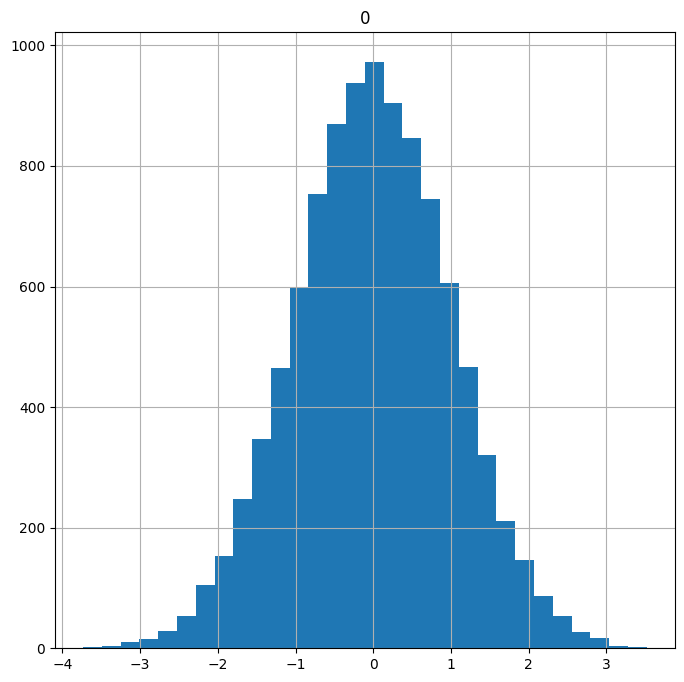

In [ ]:
#The other thing important in analysis is skewed ie its general shape and how it
# is spread out.Data that is somehow evenly spread around the mean value
# called normal distribution is often well-behaved.However some datasets
#experience skewness or asymetry

normally_distributed  = np.random.normal (size = 10000) # generating normal data
normally_distributed = pd.DataFrame(normally_distributed) # converting to DF
normally_distributed.hist(figsize=(8,8), bins = 30) # plotting a histogram

# normally_distributed = np.random.normal(size = 10000) produces an array of
# 10,000 random numbers sampled from a normal distribution.These numbers will
# therefore follow a normal distribution with a mean of zero and a variance of
# of 1

# normally_distributed = pd.DataFrame(normally_distributed) this line converts
# The numpy array array "normally distributed" into a pandas DataFrame and the
# dataframe will have a single column containing the random numbes generated
# from the normal distribution

# the last line plots a histogram of the data by setting figsize = (8,8) to
# 8 by 8 inches and bins = 30 determines the no of bins to use in the histogram
#More bins result in more detail by reducing the range

array([[<Axes: title={'center': '0'}>]], dtype=object)

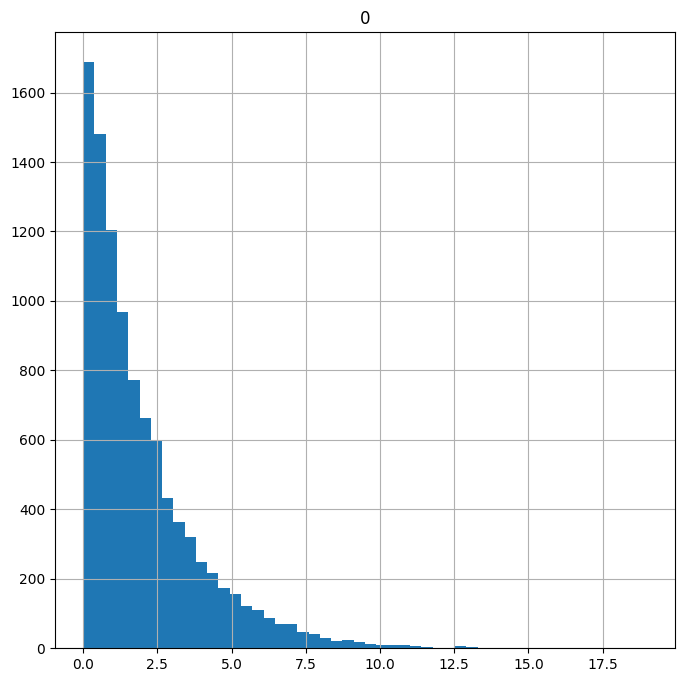

In [ ]:
skewed = np.random.exponential(scale =2 , size = 10000) #generate skewed data
skewed = pd.DataFrame(skewed)
skewed.hist(figsize = (8,8), bins = 50)

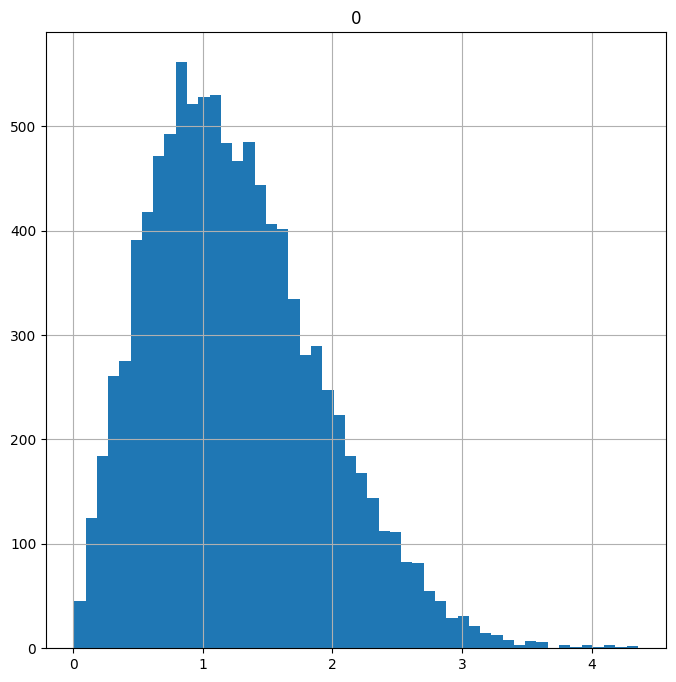

In [ ]:
#the sqaureroot fcn can be used to modify the data abit

sqrt_transformed =skewed.apply(np.sqrt)

sqrt_transformed.hist(figsize = (8, 8), bins = 50);

array([[<Axes: title={'center': '0'}>]], dtype=object)

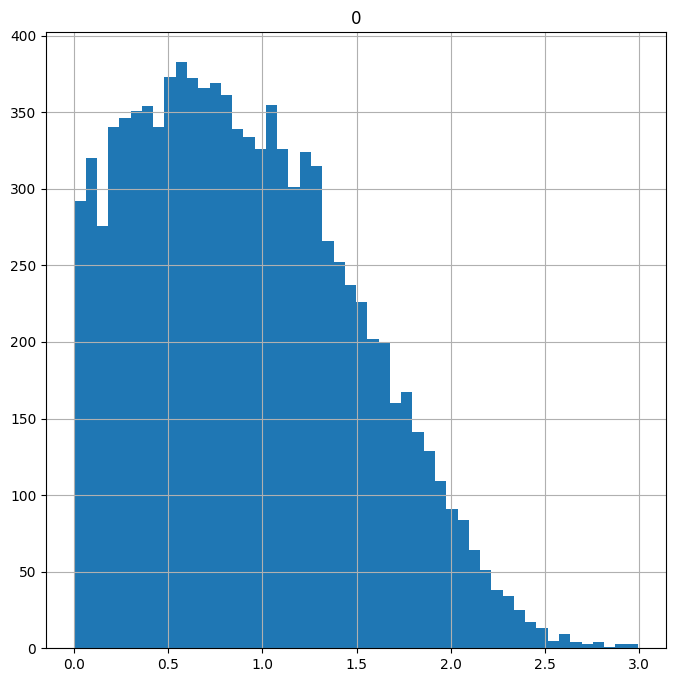

In [ ]:
#now after applying the squareroot function,the data appears to have a somewhat
# a normally distributed curve

# we can apply a log transformation as well

log_transformed = (skewed + 1).apply(np.log)  # get log of the data
log_transformed.hist(figsize = (8, 8), bins = 50)

In [ ]:
# In predictive modelling, every variable used to construct a model would ideally
# represent some specific characteristic of data ie the need for each variable to
# explain something different
# However, variables often experience collinearity hence variables with
# strong correlations can interfere with each other when doing predictive modelling
 # a correlation of 0 means that variables are not correlated at all
 # and that of 1 means that when one goes up the other too does
 # -1 means that when goes up one goes down

In [ ]:
mtcars.iloc[:, 0:6].corr() # check correlation

,mpg,cyl,disp,hp,drat,wt
mpg,1.000000,-0.734018,-0.689418,-0.560904,0.727087,-0.860103
cyl,-0.734018,1.000000,0.886392,0.891427,-0.439669,0.764533
disp,-0.689418,0.886392,1.000000,0.866490,-0.701672,0.854579
hp,-0.560904,0.891427,0.866490,1.000000,-0.306172,0.569348
drat,0.727087,-0.439669,-0.701672,-0.306172,1.000000,-0.882287
wt,-0.860103,0.764533,0.854579,0.569348,-0.882287,1.000000


array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cyl', ylabel='mpg'>,
        <Axes: xlabel='disp', ylabel='mpg'>,
        <Axes: xlabel='hp', ylabel='mpg'>,
        <Axes: xlabel='drat', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cyl'>,
        <Axes: xlabel='cyl', ylabel='cyl'>,
        <Axes: xlabel='disp', ylabel='cyl'>,
        <Axes: xlabel='hp', ylabel='cyl'>,
        <Axes: xlabel='drat', ylabel='cyl'>],
       [<Axes: xlabel='mpg', ylabel='disp'>,
        <Axes: xlabel='cyl', ylabel='disp'>,
        <Axes: xlabel='disp', ylabel='disp'>,
        <Axes: xlabel='hp', ylabel='disp'>,
        <Axes: xlabel='drat', ylabel='disp'>],
       [<Axes: xlabel='mpg', ylabel='hp'>,
        <Axes: xlabel='cyl', ylabel='hp'>,
        <Axes: xlabel='disp', ylabel='hp'>,
        <Axes: xlabel='hp', ylabel='hp'>,
        <Axes: xlabel='drat', ylabel='hp'>],
       [<Axes: xlabel='mpg', ylabel='drat'>,
        <Axes: xlabel='cyl', ylabel='drat'>,
        <Axes: xlabel=

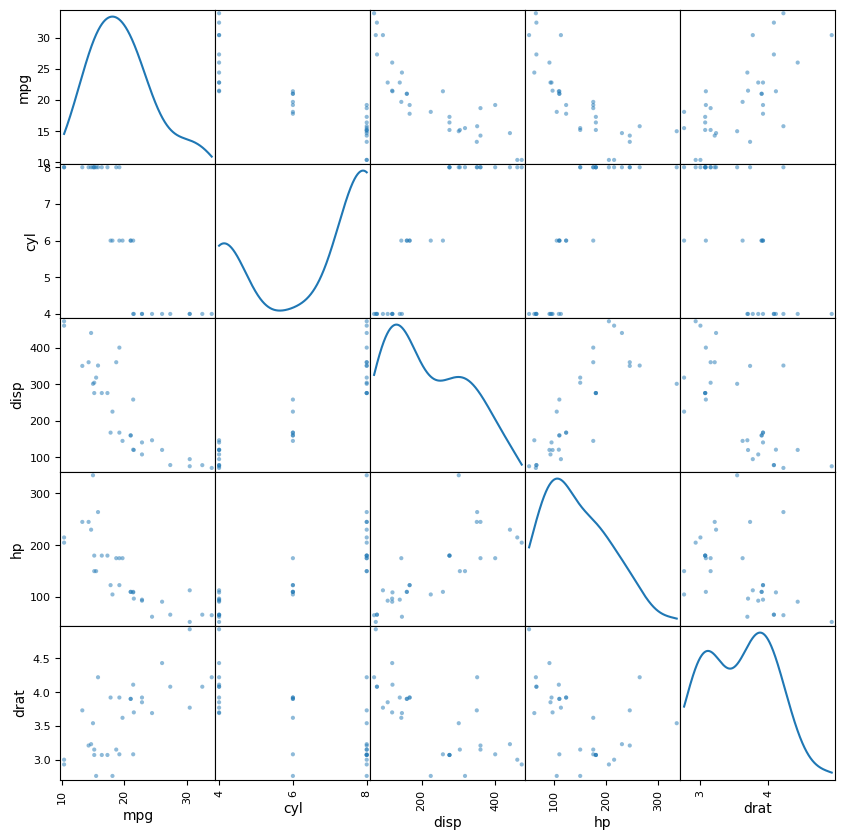

In [ ]:
# a scatterplot can be useful in assessing collinearity
# and we can create one using a pandas function scatter_matrix()
# from the tools.plotting folder

import pandas as pd

mtcars = pd.read_csv("mtcars.csv")

from pandas.plotting import scatter_matrix
scatter_matrix(mtcars.iloc[:, 0:6],
               figsize = (10, 10),
               diagonal = "kde")

In [ ]:
#reducing the size of a dataset by removing variables or using a technique
# to combine them is called dimensionality reduction
#filling in numerical variables is called imputation
# sklearn has an Imputer function

import numpy as np
from sklearn.impute import SimpleImputer

# the line below introduces some missing values into the data
mtcars["mpg"] = np.where(mtcars["mpg"]>22 , None, mtcars["mpg"])

mtcars["mpg"]

0     21.0
1     21.0
2     None
3     21.4
4     18.7
5     18.1
6     14.3
7     None
8     None
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    None
18    None
19    None
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    None
26    None
27    None
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: object